# Monthly enquiry - time series investigation

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
me = pd.read_csv("Monthly_enquiry.csv")
me.head()

,Member_id,Type,Date
0,a122,Private,1/09/2016
1,ax88,Dealer,1/09/2016
2,a123,Private,1/09/2016
3,a123,Private,1/09/2016
4,a124,Private,1/09/2016


## monthly insight - aggregated data groupby Date and Type

In [3]:
dt=me.groupby(['Date','Type']).count()
dt=dt.unstack()
dt.reset_index(level=0, inplace=True)
dt=dt.fillna(0)
dt.head()

Date Member_id         
Type                 Dealer Private
0      1/09/2016        1.0    10.0
1     10/09/2016        1.0     8.0
2     11/09/2016        1.0     5.0
3     12/09/2016        0.0     2.0
4     13/09/2016        0.0     5.0

In [4]:
dt['date'] = pd.to_datetime(dt['Date'], format='%d/%m/%Y')
dt.head()

Date Member_id                date
Type                 Dealer Private           
0      1/09/2016        1.0    10.0 2016-09-01
1     10/09/2016        1.0     8.0 2016-09-10
2     11/09/2016        1.0     5.0 2016-09-11
3     12/09/2016        0.0     2.0 2016-09-12
4     13/09/2016        0.0     5.0 2016-09-13

In [5]:
import calendar
dt['Day_of_Week'] = pd.to_datetime(dt['Date'], format='%d/%m/%Y').dt.weekday_name
dt.head()

Date Member_id                date Day_of_Week
Type                 Dealer Private                       
0      1/09/2016        1.0    10.0 2016-09-01    Thursday
1     10/09/2016        1.0     8.0 2016-09-10    Saturday
2     11/09/2016        1.0     5.0 2016-09-11      Sunday
3     12/09/2016        0.0     2.0 2016-09-12      Monday
4     13/09/2016        0.0     5.0 2016-09-13     Tuesday

In [6]:
dt.set_index('date', inplace=True)
dt.sort_index(inplace=True)

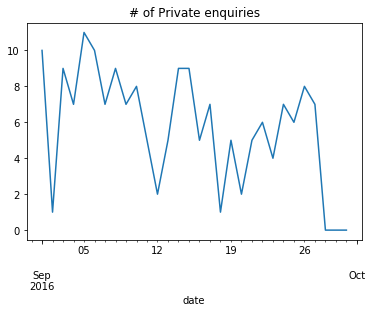

In [14]:
dt[('Member_id ', 'Private')].plot(title='# of Private enquiries')
plt.savefig('# of Private enquiries.png',bbox_inches='tight')

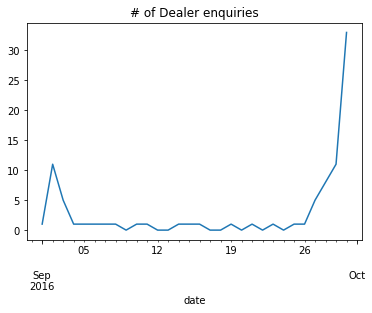

In [13]:
dt[('Member_id ', 'Dealer')].plot(title='# of Dealer enquiries')
plt.savefig('# of Dealer enquiries.png',bbox_inches='tight')

In [9]:
dt['total']=dt[('Member_id ', 'Dealer')]+dt[('Member_id ', 'Private')]

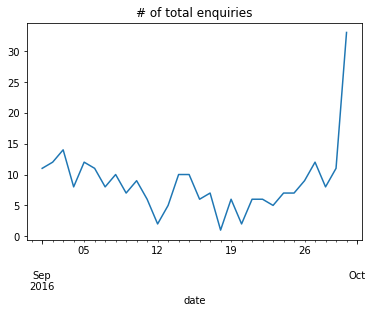

In [15]:
dt['total'].plot(title='# of total enquiries')
plt.savefig('# of total enquiries.png',bbox_inches='tight')